# debugging notebook

Leanne Friedrich 7/31/23: For debugging individual files

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
from py.full_sequence import SDTWorkflow, fullSequencer
LOGGERDEFINED = logs.openLog('debug.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# single folder

In [52]:
folder2 = os.path.join(cfg.path.server, r'SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_10.00')
sw = SDTWorkflow(folder2)
sw.run(progDimsK={'overwrite':False, 'getBlips':True})

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_10.00\disturbUnder_1_0.500_VF_10.00_VS_10.00_timeRewrite_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_143610_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_10.00\disturbUnder_1_0.500_VF_10.00_VS_10.00_flagFlip_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_143610_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_10.00\disturbUnder_1_0.500_VF_10.00_VS_10.00_progPos_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_143610_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_10.00\disturbUnder_1_0.500_VF_10.00_VS_10.00_progDims_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019

In [18]:
from py.val.v_print import printVals

In [51]:
pv = printVals(os.path.join(cfg.path.server, r'SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_10.00'))

In [42]:
pv.metarow()

({'printFolder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\PDMSS_vsweep\\8_3.50\\vsweep_231019\\disturbUnder_1_0.500_VF_10.00_VS_4.44',
  'bn': 'I_PDMSS8-S85-0.05_S_3.50',
  'date': 231019,
  'sigma': 7.905,
  'fluFile': True,
  'calibFile': True,
  'spacing': 0.5,
  'vRatio': 2.252252252252252,
  'dEst': 0.9049525894704037,
  'viscRatio': 0.20976864964197103,
  'tau0aRatio': 0.2072896891677191,
  'tau0dRatio': 0.29733952341149117,
  'GaRatio': 1.2467252453881479,
  'GdRatio': 1.2661121576095935,
  'GtaRatio': 32.33214598525278,
  'tGdRatio': 0.0005168681382248155,
  'rGrava': 0,
  'rGravd': 0,
  'int_Re': 0.0005039459623026911,
  'ReRatio': 7.1381631909134,
  'hDragP': 155.0696905096391,
  'vDragP': 702.8947043493841,
  'int_CaInv': 0.06606455774465628,
  'pressureCh0': 164026.61794446222,
  'ink_shortname': 'PDMSS8-S85-0.05',
  'ink_days': 1,
  'ink_rheModifier': 'Aerosil R812S',
  'ink_surfactant': 'Span 85',
  'ink_surfactantWt': 0.05,
  'ink_diluent': 'si

In [232]:
sw.approve()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS6-S85-0.05_S_3.00\I_PDMSS6-S85-0.05_S_3.00_230908\disturbUnder_3_0.500\disturbUnder_3_0.500_failures_I_PDMSS6-S85-0.05_S_3.00_230908_162255_9.csv


In [4]:
sw.putStillsAway()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\PDMSS_vsweep\\I_PDMSS8-S85-0.05_S_3.50\\I_PDMSS8-S85-0.05_S_3.50_vsweep_231019\\disturbUnder_1_0.500_VF_10.00_VS_4.44\\disturbUnder_1_0.500_VF_10.00_VS_4.44_Basler camera_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140016_7.png' -> '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\PDMSS_vsweep\\I_PDMSS8-S85-0.05_S_3.50\\I_PDMSS8-S85-0.05_S_3.50_vsweep_231019\\disturbUnder_1_0.500_VF_10.00_VS_4.44\\raw\\disturbUnder_1_0.500_VF_10.00_VS_4.44_Basler camera_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140016_7.png'

In [43]:
sw.pdim.exportAll(diag=2, getBlips=True, overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_4.44\disturbUnder_1_0.500_VF_10.00_VS_4.44_timeRewrite_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140015_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_4.44\disturbUnder_1_0.500_VF_10.00_VS_4.44_flagFlip_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140015_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_4.44\disturbUnder_1_0.500_VF_10.00_VS_4.44_progPos_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140015_1.csv
0.9049525894704037 0.5 0.45247629473520184
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_4.44\disturbUnder_1_0.500_VF_10.00_VS_4.44_progDims_I_P

In [197]:
sw.exportStills(overwrite=False, dstart_manual=2)

INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p1_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p2_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p3_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p4_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p5_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o1_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o2_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o3_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o4_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o5_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Expo

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_nozDims_I_SO7-S20-0.5_S_4.00_230509_184252_2.csv


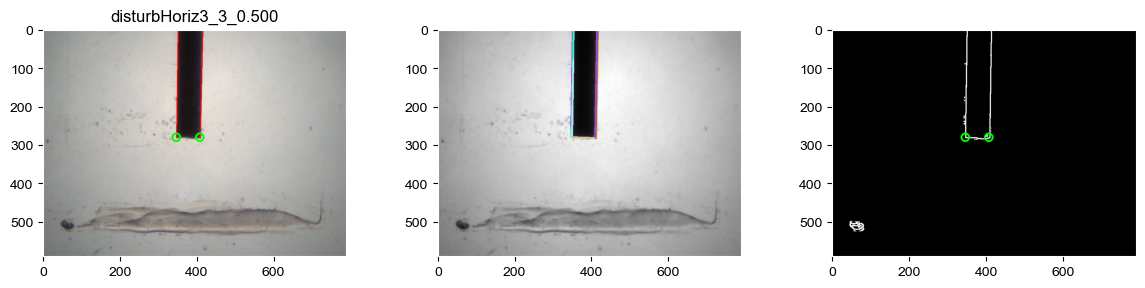

In [1864]:
sw.detectNozzle(overwrite=True, diag=3, bgmode=0, modes=[0], frameGetMode=1)

INFO: Exported disturbUnder_1_0.500_VF_10.00_VS_4.44_Usegment_HIh1_l1d1o3_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140015_1.png


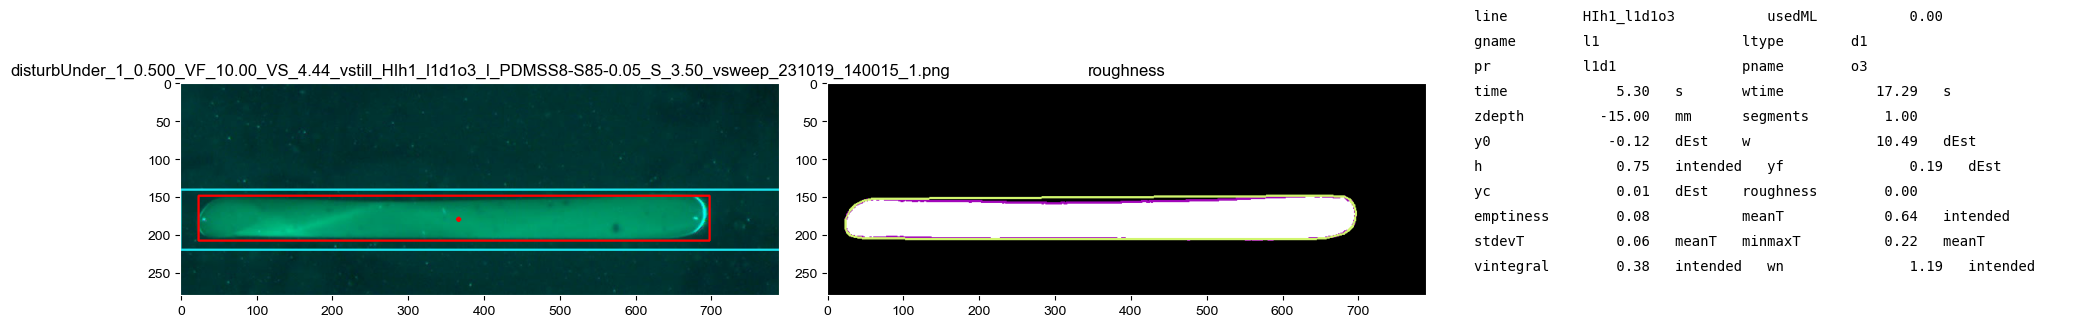

In [48]:
newcl = False
sw.testImage('l1d1o3', diag=1,  overrideSegment=True, useML=False
             , overwriteCropLocs=newcl, exportCropLocs=newcl)

In [1866]:
sw.adjustNozzle()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_background_I_SO7-S20-0.5_S_4.00_230509_184252_2.png


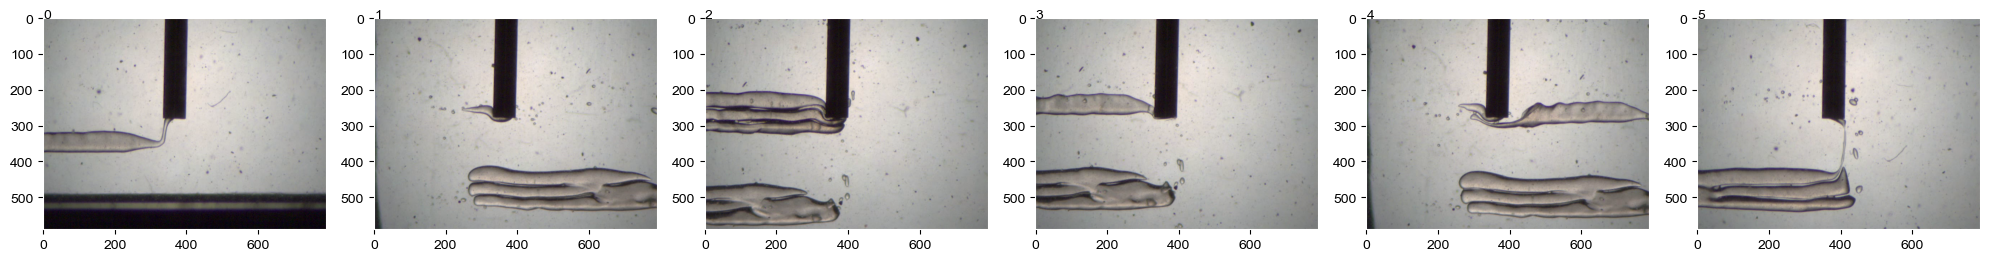

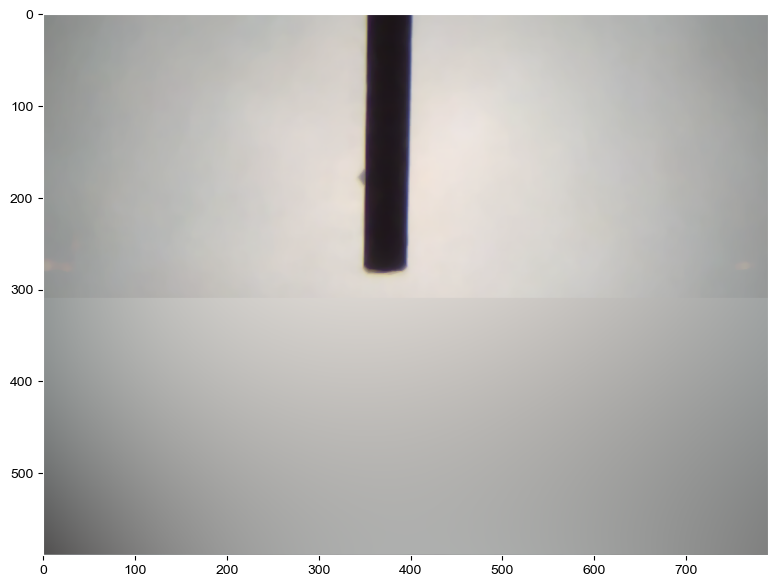

In [1863]:
sw.exportBackground(overwrite=True, diag=2, ymin=10, curveFit=True, numpics=6, mode=2, frameGetMode=0)

In [306]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, overrideSegment=True, overwriteCropLocs=True, useML=False)

INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1o1_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1o2_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1o3_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1o4_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1o5_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1o6_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1o7_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1o8_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1p1_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l0w1p2_I_PDMSS12.5_S_4.00_230920_144520_2.png
INFO: Exported disturbUnder_3_1.000_Useg

In [352]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.00\I_PDMSS8-S85-0.05_S_3.00_230920\disturbUnder_3_1.000\disturbUnder_3_1.000_failures_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.00\I_PDMSS8-S85-0.05_S_3.00_230920\disturbUnder_3_1.000\disturbUnder_3_1.000_measure_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.00\I_PDMSS8-S85-0.05_S_3.00_230920\disturbUnder_3_1.000\disturbUnder_3_1.000_summary_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.csv


In [69]:
sw.showFailures()

,file,error
0,successes,
1,l0w1p1,no vals detected
2,l0w1p2,no vals detected
3,l0w1p3,no vals detected
4,l1w1p1,no vals detected
5,l1w1p2,no vals detected
6,l1w1p3,no vals detected
7,l2w1p1,no vals detected
8,l2w1p2,no vals detected
9,l2w1p3,no vals detected


,line,usedML


In [353]:
sw.approve()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.00\I_PDMSS8-S85-0.05_S_3.00_230920\disturbUnder_3_1.000\disturbUnder_3_1.000_failures_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.csv


disturbHoriz3_3_0.750_vstill_HOh3_l3w1p1_I_SO7-S20-0.5_S_4.00_230509_184700_6.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_3_0.750\disturbHoriz3_3_0.750_cropLocs_I_SO7-S20-0.5_S_4.00_230509_184700_6.csv
INFO: Exported disturbHoriz3_3_0.750_Usegment_HOh3_l3w1p1_I_SO7-S20-0.5_S_4.00_230509_184700_6.png


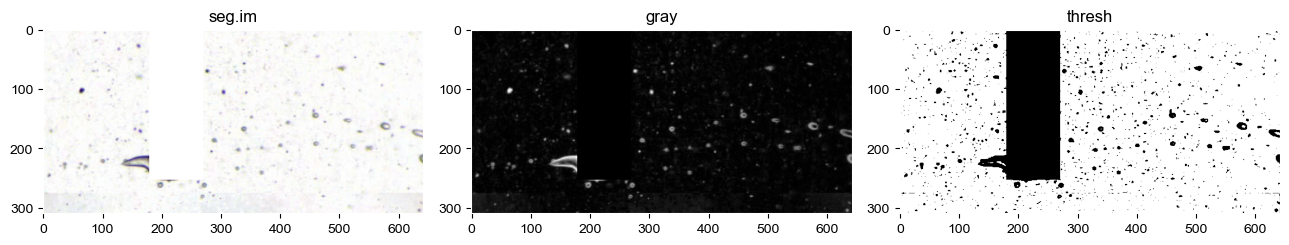

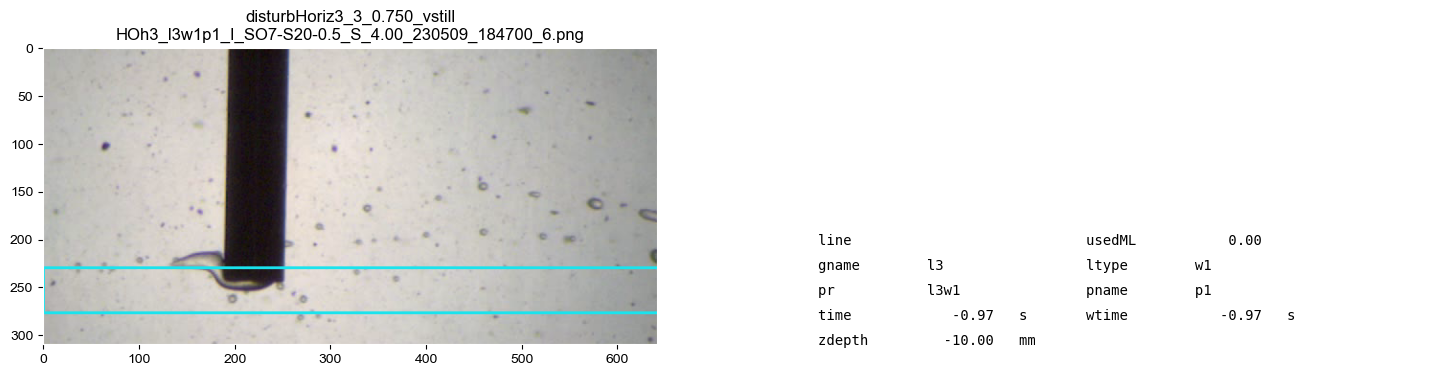

In [574]:
newcl = False
sw.testFailure(4, diag=1,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

In [351]:
newcl = True
tag = 'l2w3o'
if len(tag)==6:
    diag = 2
else:
    diag = 0
sw.testImage(tag, diag=diag,  overrideSegment=True, useML=False
             , overwriteCropLocs=newcl, exportCropLocs=newcl, topthresh=220, gradientSlope=0)

INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l2w3o1_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l2w3o2_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l2w3o3_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l2w3o4_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l2w3o5_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l2w3o6_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l2w3o7_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.png
INFO: Exported disturbUnder_3_1.000_Usegment_HIh3_l2w3o8_I_PDMSS8-S85-0.05_S_3.00_230920_155631_0.png


In [223]:
sw.openLastImage()

In [348]:
sw.openLastSeries(nmax=7, scrollRight=True, dropper=False, scrollDown=True)

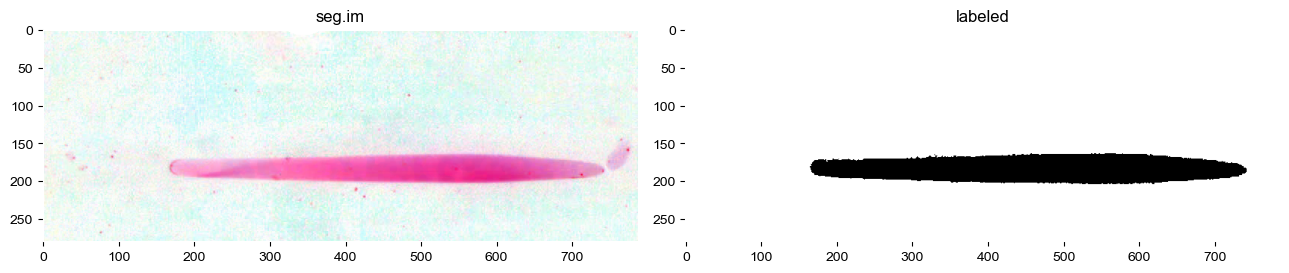

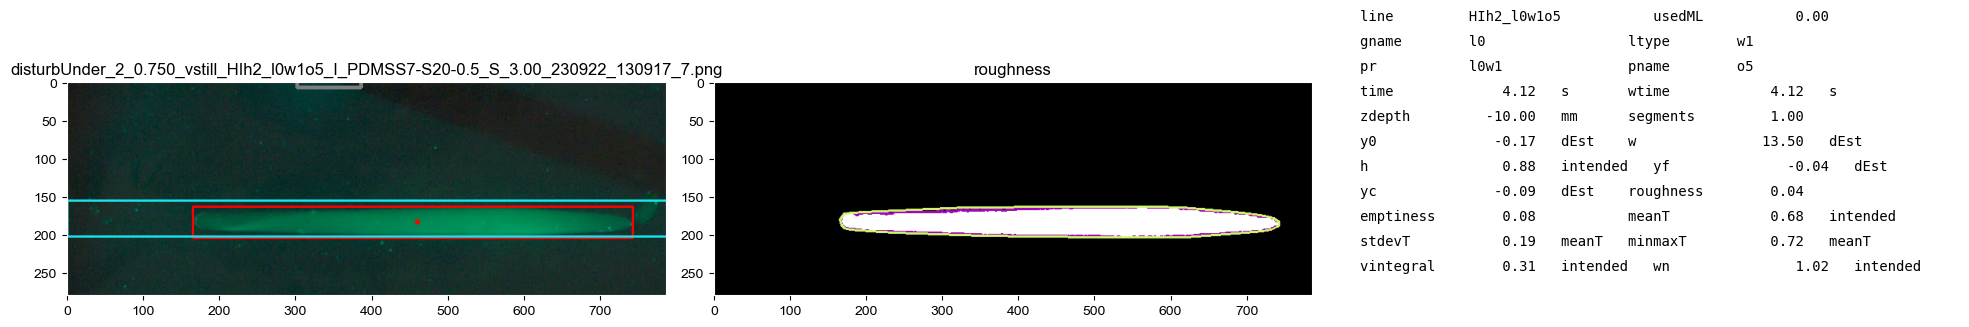

In [1666]:
sw.testImage('l0w1o5', diag=1,  overrideSegment=False, useML=False)

In [125]:
sw.whiteOutLast()

INFO: Whited out \SDT\PDMSS_S85-0.05\I_PDMSS10-S85-0.05_S_4.00\I_PDMSS10-S85-0.05_S_4.00_230908\disturbUnder_3_0.500\disturbUnder_3_0.500_vstill_HIh3_l0w3p5_I_PDMSS10-S85-0.05_S_4.00_230908_101209_3.png
INFO: Blacked out \SDT\PDMSS_S85-0.05\I_PDMSS10-S85-0.05_S_4.00\I_PDMSS10-S85-0.05_S_4.00_230908\disturbUnder_3_0.500\Usegment\disturbUnder_3_0.500_Usegment_HIh3_l0w3p5_I_PDMSS10-S85-0.05_S_4.00_230908_101209_3.png


In [1823]:
sw.whiteOutFiles(canMatch=['_l1d2o'])

INFO: Whited out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\disturbUnder_2_1.000_vstill_HIh2_l1d2o1_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.png
INFO: Blacked out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\Usegment\disturbUnder_2_1.000_Usegment_HIh2_l1d2o1_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.png
INFO: Whited out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\disturbUnder_2_1.000_vstill_HIh2_l1d2o2_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.png
INFO: Blacked out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\Usegment\disturbUnder_2_1.000_Usegment_HIh2_l1d2o2_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.png
INFO: Whited out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\disturbUnder_2_1.000_vstill_HIh2_l1d2o3_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.

In [840]:
from val.v_print import printVals

In [851]:
pv = printVals(os.path.join(cfg.path.server, r'SDT\PDMSS_S85-0.05\I_PDMSS8-S85-0.05_S_3.50\I_PDMSS8-S85-0.05_S_3.50_230920\disturbUnder_3_0.500'))

In [853]:
pv.sup.CaInv

0.14758245230187594